# Trabajo Práctico 6 - Procesamiento de Lenguaje Natural

## Asociación de palabras

### 1. Levantar el corpus AP, separando cada noticia como un elemento distinto en un diccionario (<DOCNO>:<TEXT>)

In [1]:
import nltk
from nltk.corpus import wordnet
from nltk.stem import WordNetLemmatizer
from urllib import request
from nltk import word_tokenize
from nltk.corpus import stopwords
from nltk.tokenize import RegexpTokenizer
from io import StringIO
import xml.etree.ElementTree as etree



nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package punkt to /home/laura/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /home/laura/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package stopwords to /home/laura/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /home/laura/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [2]:
diccionario = {}
with open('ap.txt', 'rb') as apfile:

    ap89_plain = apfile.read().decode('utf-8')

    ap89_plain = '<DOCS>\n' + ap89_plain + '</DOCS>\n'
    ap89_plain = ap89_plain.replace('&', '&#038;')
    ap89_IO = StringIO(ap89_plain)
    tree = etree.parse(ap89_IO)
    root = tree.getroot()
    
    for child in root:
        diccionario[child[0].text] = child[1].text



In [3]:
def gwp(treebank_tag):

    if treebank_tag.startswith('J'):
        return wordnet.ADJ
    elif treebank_tag.startswith('V'):
        return wordnet.VERB
    elif treebank_tag.startswith('N'):
        return wordnet.NOUN
    elif treebank_tag.startswith('R'):
        return wordnet.ADV
    else:
        return None

In [4]:
def limpiar(t):
    stop = set(stopwords.words('english'))
    
    sent = nltk.sent_tokenize(t) # separar en oraciones
    
    tokenizer = RegexpTokenizer("[\w']+")
    l = []
    for s in map(tokenizer.tokenize, sent): # sacar stopwords
        l.append([word for word in s if word not in stop])
     
    wl = WordNetLemmatizer()
    r = []
    importantes = ['J', 'V', 'N', 'R']
    for s in map(nltk.pos_tag, l): # filtramos palabras importantes y con una longitud mayor a dos
        r.append([wl.lemmatize(w, pos=gwp(t)) for (w, t) in s if w != t and len(w)>2 and t[0] in importantes] )
      
    return [item for l in r for item in l]

palabras = []
for noticia in diccionario.values():
    for word in limpiar(noticia):
        palabras.append(word)


### 2. Calcular el tamaño del vocabulario.

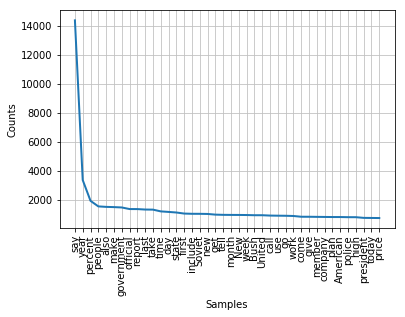

In [22]:
from nltk import FreqDist
Freq=FreqDist(palabras)
FreqDist(palabras).plot(40, cumulative=False)

In [5]:
#from itertools import groupby

#freq = {}
#for palabra in set(palabras):
#        freq[palabra] = palabras.count(palabra)

In [20]:
print('Tamaño del vocabulario: ' + str(len(Freq)))

Tamaño del vocabulario: 36374


In [7]:
#most_freq = sorted(freq.items(), key=lambda x: x[1], reverse=True)[0:500]
#print (most_freq)

### 3. Para las 500 palabras con más apariciones, calcular el par más asociado según la medida presentada.

In [27]:
# Se buscan los pares de palabras más asociados dentro de todo el texto 
from nltk.collocations import *
bigram_measures= nltk.collocations.BigramAssocMeasures()
finder =BigramCollocationFinder.from_words(palabras,3)
finder.apply_freq_filter(3)
scored=finder.nbest(bigram_measures.pmi,20)
print(scored)

[('Cam', 'Ranh'), ('Chi', 'Chi'), ('Cordon', 'Bleu'), ('Croatia', 'Slovenia'), ('Doo', 'hwan'), ('Gazeta', 'Wyborcza'), ('Guess', 'Jeans'), ('JNB', 'Exploration'), ('Novaya', 'Zemlya'), ('Nueva', 'Vizcaya'), ('Palmieri', 'Billig'), ('Palo', 'Alto'), ('Tan', 'Ching'), ('Term', 'Strategy'), ('Yasuhiro', 'Nakasone'), ('Yom', 'Kippur'), ('avant', 'garde'), ('Adventures', 'Munchausen'), ('Coeur', "d'Alene"), ('Coral', 'Gables')]


## Información Léxica
Bajar de Project Gutenberg el libro de Darwin ON THE ORIGIN OF SPECIES.
1. Procesar el texto, tokenizando eliminando signos de puntuación.
2. Siguiendo el artículo de la sección, calcular la autocorrelación para estimar la distribución de la palabra a lo largo del texto.
3. Armar una función que reciba una lista de tokens, una lista de palabras y un tamaño de ventana y devuelva una lista de probabilidades de encontrar la palabra en cada ventana para cada palabra pasada por parámetro.
4. Calcular la entropía de la distribución de palabras seleccionadas para distintos tamaños de ventana.
5. Generar una versión randomizada del texto, y medir la entropía de las palabras randomizadas.
6. Distinguir las palabras del texto en artículos, sustantivos y adjetivos usando un POS-tagger. Verificar si las medidas separan a estos grupos de palabras.

In [9]:
# descargamos el libro
url = "http://www.gutenberg.org/cache/epub/1228/pg1228.txt"
response = request.urlopen(url)
raw = response.read().decode('utf8')

In [10]:
#se recortará el documento de forma tal que sólo quede el contenido de los distintos capítulos
inicio=raw.rfind("INTRODUCTION.") #aquí comenzaría
fin=raw.rfind("INDEX.") #aquí terminaría
libro = raw[inicio:fin]

#se tokenizará el texto y se eliminarán los signos de puntuación
tokenizer = RegexpTokenizer(r'\w+')
lib_tok=tokenizer.tokenize(libro)
#tokens = word_tokenize(libro)



## Word embeddings, distancia semántica y WordNet
1. Utilizando el test WordSim3531, comparar el rendimiento entre LSA y Word2Vec2.
2. Comparar los distintos word embeddings con las medidas definidas en WordNet. 